In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder


import tensorflow as tf

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint,EarlyStopping

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.
import datetime

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.read_csv("../../input/mitbih_train.csv", header=None)
df2 = pd.read_csv("../..//input/mitbih_test.csv", header=None)
df = pd.concat([df, df2], axis=0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


In [5]:
df[187].value_counts()

187
0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64

In [6]:
M = df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

In [7]:
del df
del df2
del M

# Visual Input

In [8]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

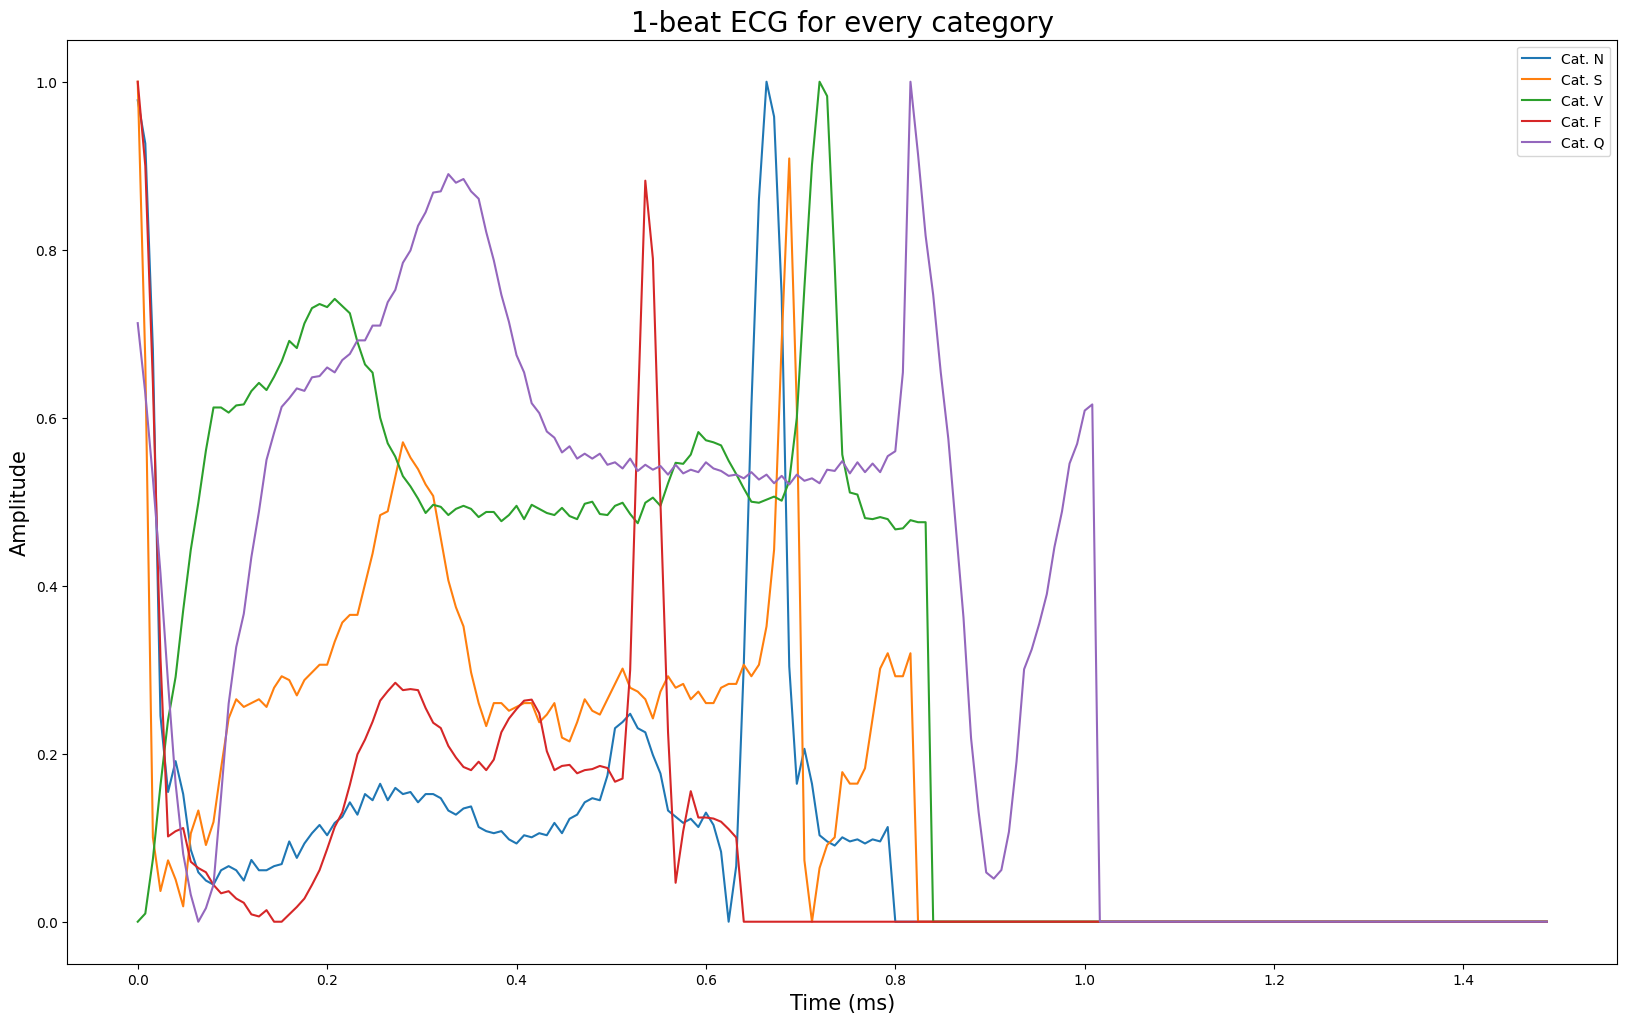

In [9]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X[C0, :][0], label="Cat. N")
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

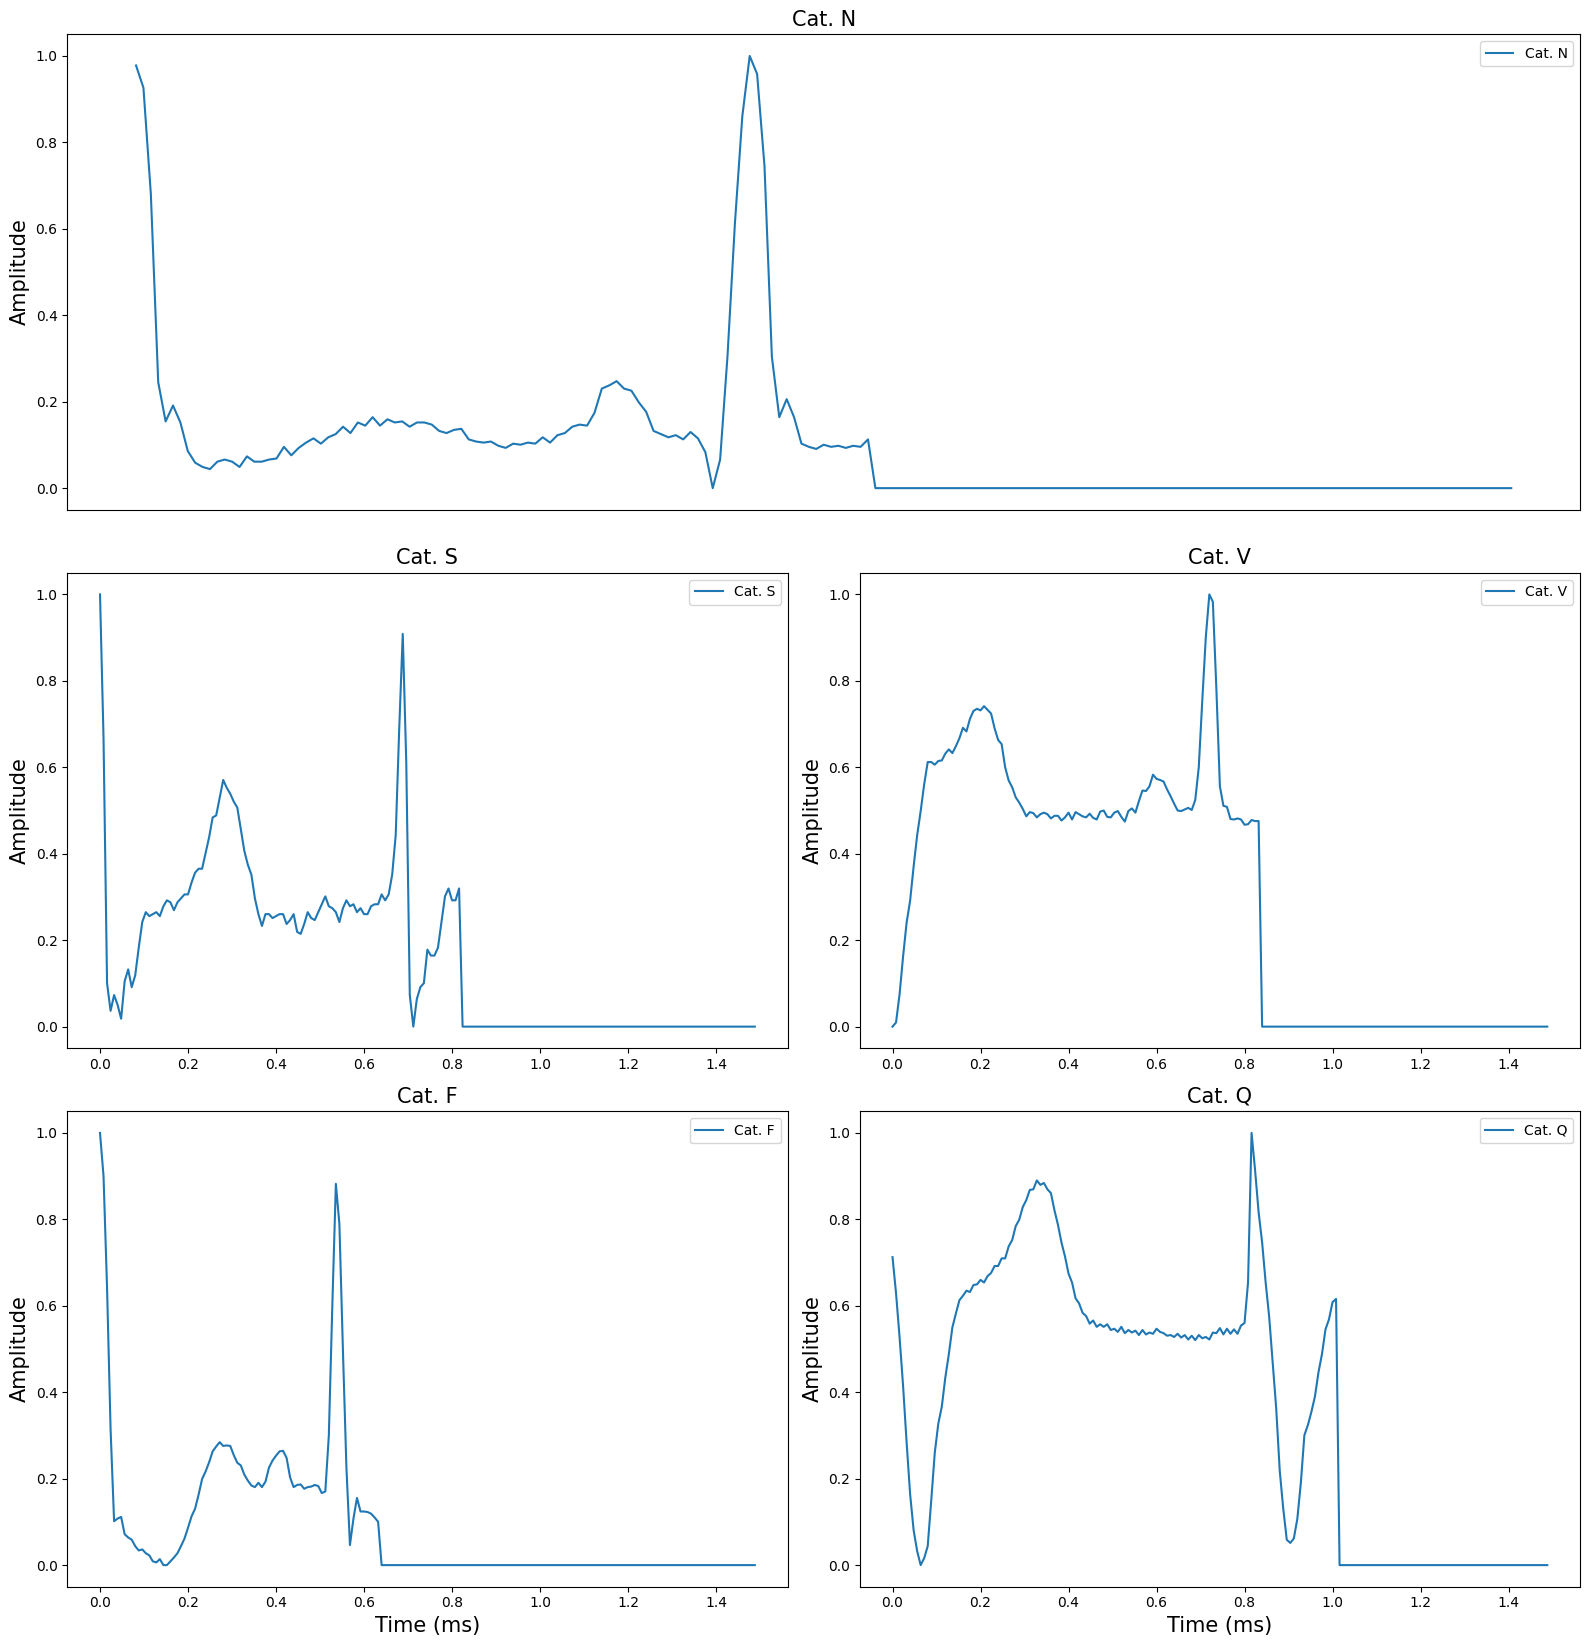

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# بيانات عشوائية للعرض
x = np.arange(0, 187) * 8 / 1000
# على افتراض أن X هو مصفوفة من البيانات التي تود رسمها
# X = np.random.randn(5, 187)  # مثال عشوائي

# إعداد الشكل
plt.figure(figsize=(16, 18))

# السطر الأول: Cat. N
plt.subplot(3, 1, 1)
plt.plot(x, X[C0, :][0], label="Cat. N")
plt.title("Cat. N", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend()
plt.xticks([])  # إزالة المحور الأفقي للسطر الأول

# السطر الثاني: Cat. S و Cat. V
plt.subplot(3, 2, 3)
plt.plot(x, X[C1, :][0], label="Cat. S")
plt.title("Cat. S", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, X[C2, :][0], label="Cat. V")
plt.title("Cat. V", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend()

# السطر الثالث: Cat. F و Cat. Q
plt.subplot(3, 2, 5)
plt.plot(x, X[C3, :][0], label="Cat. F")
plt.title("Cat. F", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x, X[C4, :][0], label="Cat. Q")
plt.title("Cat. Q", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.legend()

# إضافة عنوان رئيسي

# عرض الرسم
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Data augmentation

To train properly the model, we sould have to augment all data to the same level. Nevertheless, for a first try, we will just augment the smallest class to the same level as class 1. With that we will be able to have a test set of around 5x800 observations.

In [10]:
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

# def augment(x):
#     result = np.zeros(shape= (4, 187))
#     for i in range(3):
#         if random.random() < 0.33:
#             new_y = stretch(x)
#         elif random.random() < 0.66:
#             new_y = amplify(x)
#         else:
#             new_y = stretch(x)
#             new_y = amplify(new_y)
#         result[i, :] = new_y
#     return result

def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(len(result)):
        tmp = random.random()
        if tmp < 0.33:
            new_y = stretch(x)
        elif tmp < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

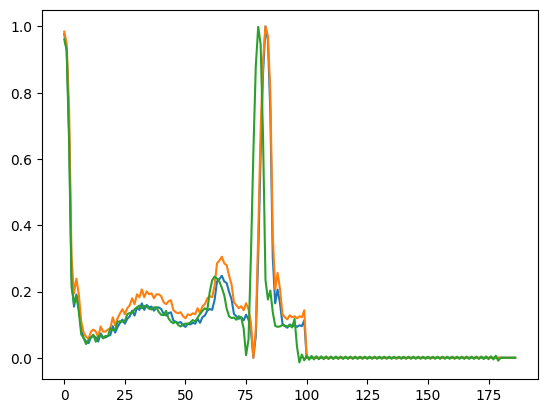

In [11]:
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [12]:
result = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
classe = np.ones(shape=(result.shape[0],), dtype=int)*3
X = np.vstack([X, result])
y = np.hstack([y, classe])

# Split

In [13]:
subC0 = np.random.choice(C0, 800)
subC1 = np.random.choice(C1, 800)
subC2 = np.random.choice(C2, 800)
subC3 = np.random.choice(C3, 800)
subC4 = np.random.choice(C4, 800)

In [14]:
X_test = np.vstack([X[subC0], X[subC1], X[subC2], X[subC3], X[subC4]])
y_test = np.hstack([y[subC0], y[subC1], y[subC2], y[subC3], y[subC4]])

X_train = np.delete(X, [subC0, subC1, subC2, subC3, subC4], axis=0)
y_train = np.delete(y, [subC0, subC1, subC2, subC3, subC4], axis=0)

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

del X
del y

In [15]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

In [16]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (109150, 187, 1)
y_train (109150,)
X_test (4000, 187, 1)
y_test (4000,)


In [17]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

y_train=y_train.toarray()
y_test=y_test.toarray()

In [18]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (109150, 187, 1)
y_train (109150, 5)
X_test (4000, 187, 1)
y_test (4000, 5)


# Model

Now let's re-create the model from the ArXiv Document

In [43]:
n_obs, feature, depth = X_train.shape
batch_size = 500

In [44]:
K.clear_session()

inp = Input(shape=(feature, depth))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S21)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

2024-07-26 21:51:12.861427: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-26 21:51:13.029380: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-26 21:51:13.029444: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-26 21:51:13.071258: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-26 21:51:13.071473: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 183, 32)   │        192 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 183, 32)   │      5,152 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 183, 32)   │          0 │ conv1d_1[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 183, 32)   │      5,152 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 183, 32)   │          0 │ conv1d_2[0][0],   │
│                     │                   │            │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 183, 32)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 90, 32)    │          0 │ activation_1[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 90, 32)    │      5,152 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 90, 32)    │          0 │ conv1d_3[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 90, 32)    │      5,152 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 90, 32)    │          0 │ conv1d_4[0][0],   │
│                     │                   │            │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 90, 32)    │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 43, 32)    │          0 │ activation_3[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 43, 32)    │      5,152 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 43, 32)    │          0 │ conv1d_5[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 43, 32)    │      5,152 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 43, 32)    │          0 │ conv1d_6[0][0],   │
│                     │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 43, 32)    │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                 

 Total params: 55,013 (214.89 KB)

 Trainable params: 55,013 (214.89 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [46]:
adam = Adam(learning_rate = 0.006, beta_1 = 0.9, beta_2 = 0.999)

In [47]:
##model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.006), loss="mae")
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [48]:
history = model.fit(X_train,y_train, 
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_data=(X_test, y_test), 
                    callbacks=[lrate])


Epoch 1/75


I0000 00:00:1722030689.570162    1390 service.cc:145] XLA service 0x7f3420018f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722030689.596205    1390 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-07-26 21:51:30.173481: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-26 21:51:31.870787: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1722030710.772960    1390 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 - 45s - 207ms/step - accuracy: 0.8973 - loss: 0.3488 - val_accuracy: 0.7325 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 2/75
219/219 - 4s - 17ms/step - accuracy: 0.9624 - loss: 0.1387 - val_accuracy: 0.8695 - val_loss: 0.4391 - learning_rate: 0.0010
Epoch 3/75
219/219 - 3s - 16ms/step - accuracy: 0.9717 - loss: 0.1000 - val_accuracy: 0.8792 - val_loss: 0.4363 - learning_rate: 0.0010
Epoch 4/75
219/219 - 4s - 16ms/step - accuracy: 0.9750 - loss: 0.0860 - val_accuracy: 0.8898 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 5/75
219/219 - 3s - 16ms/step - accuracy: 0.9789 - loss: 0.0736 - val_accuracy: 0.8910 - val_loss: 0.3556 - learning_rate: 0.0010
Epoch 6/75
219/219 - 3s - 16ms/step - accuracy: 0.9807 - loss: 0.0665 - val_accuracy: 0.8852 - val_loss: 0.3595 - learning_rate: 0.0010
Epoch 7/75
219/219 - 3s - 16ms/step - accuracy: 0.9814 - loss: 0.0622 - val_accuracy: 0.9038 - val_loss: 0.3043 - learning_rate: 0.0010
Epoch 8/75
219/219 - 3s - 15ms/step - accuracy: 0.9829 - 

In [49]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

In [19]:
#tf.keras.models.save_model(model,'./model.keras')
model=tf.keras.models.load_model('./model.keras')
y_pred = model.predict(X_test, batch_size=1000)

2024-07-31 10:25:02.975860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-31 10:25:03.245271: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-31 10:25:03.245419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-31 10:25:03.287297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-31 10:25:03.287439: I external/local_xla/xla/stream_executor

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step


I0000 00:00:1722421525.429829     127 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [51]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       800
           1       1.00      0.85      0.92       800
           2       0.95      0.95      0.95       800
           3       0.99      0.92      0.95       800
           4       1.00      0.99      0.99       800

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



In [52]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(y_test, y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(y_test, y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(y_test, y_pred)))

ranking-based average precision : 0.970
Ranking loss : 0.017
Coverage_error : 1.069


In [53]:
print(history)

/tmp/ipykernel_1076/3164239641.py:26: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=history_df[metrics], palette=palettes[1], markers=True, ax=ax[1], linewidth=2.5, legend="full")


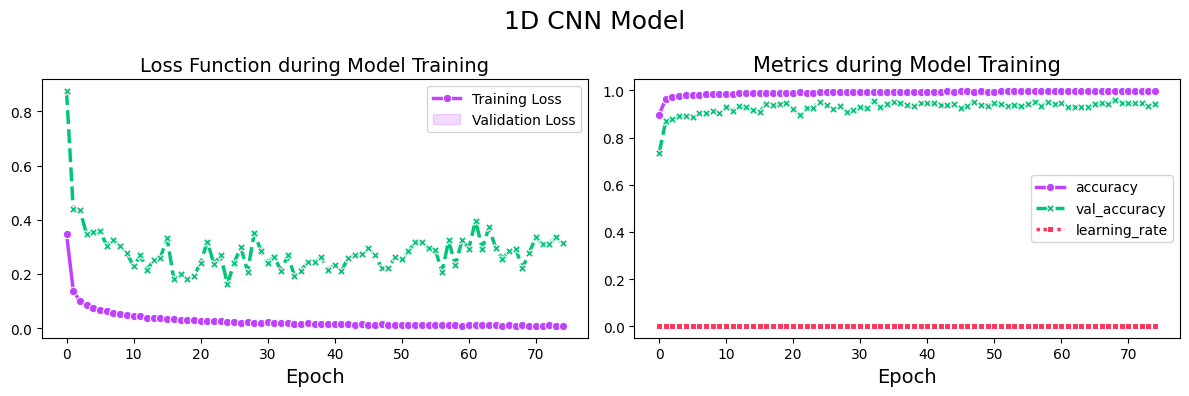

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# نفترض أن لديك كائن history من تدريب النموذج
# history = model.fit(...).history

# تحويل history إلى DataFrame
history_df = pd.DataFrame(history.history)

colors = ['#C042FF', '#03C576FF', '#FF355A', '#03C5BF', '#96C503', '#C5035B']
palettes = [sns.color_palette(colors, 2),
            sns.color_palette(colors, 4),
            sns.color_palette(colors[:2]+colors[-2:] + colors[2:-2], 6)]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# رسم دالة الخسارة
sns.lineplot(data=history_df[['loss', 'val_loss']], palette=palettes[0], markers=True, ax=ax[0], linewidth=2.5)
ax[0].set_title("Loss Function during Model Training", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)
ax[0].legend(['Training Loss', 'Validation Loss'])

# رسم المقاييس
metrics = [col for col in history_df.columns if col not in ['loss', 'val_loss']]
sns.lineplot(data=history_df[metrics], palette=palettes[1], markers=True, ax=ax[1], linewidth=2.5, legend="full")
ax[1].set_title("Metrics during Model Training", fontsize=15)
ax[1].set_xlabel("Epoch", fontsize=14)

plt.suptitle('1D CNN Model', fontsize=18)
plt.tight_layout()

fig.savefig("attn.png", format="png",  pad_inches=0.2, transparent=False, bbox_inches='tight')
fig.savefig("attn.svg", format="svg",  pad_inches=0.2, transparent=False, bbox_inches='tight')

Normalized confusion matrix


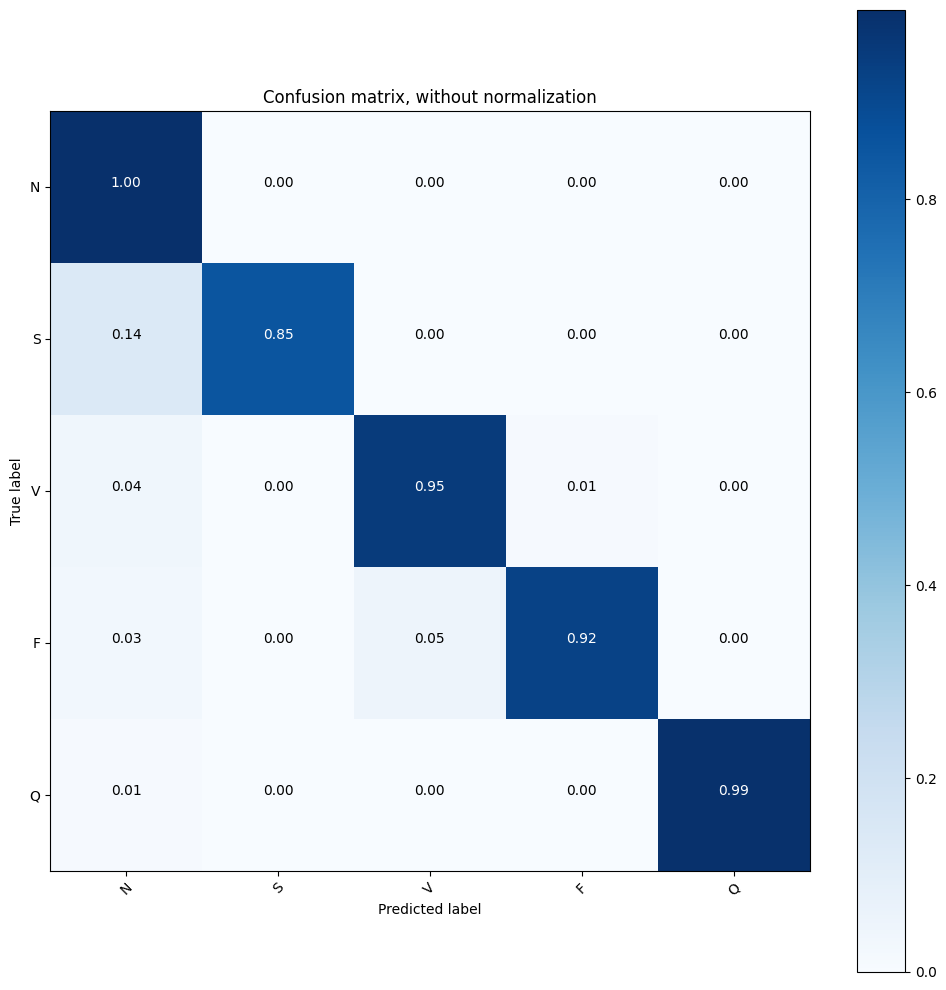

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, without normalization')
plt.show()